# Keras

Before running this template, install the following in terminal:

pip install keras

pip install tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [3]:
# or
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [4]:
# or
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [5]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [6]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
 activation_4 (Activation)   (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.datasets import mnist
from tensorflow import keras


(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [10]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5033 - accuracy: 0.8615
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2457 - accuracy: 0.9305
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2008 - accuracy: 0.9428
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1722 - accuracy: 0.9501
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1510 - accuracy: 0.9569
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1363 - accuracy: 0.9606
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1240 - accuracy: 0.9638
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1152 - accuracy: 0.9664
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1059 - accuracy: 0.9688
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0991 - accuracy: 0.9705

In [11]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split = 0.1)

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9721 - val_loss: 0.0787 - val_accuracy: 0.9787
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9739 - val_loss: 0.0783 - val_accuracy: 0.9783
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0839 - accuracy: 0.9751 - val_loss: 0.0849 - val_accuracy: 0.9763
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9761 - val_loss: 0.0809 - val_accuracy: 0.9772
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9771 - val_loss: 0.0830 - val_accuracy: 0.9763
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9790 - val_loss: 0.0863 - val_accuracy: 0.9758
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0889 - val_accuracy: 0.9738
Epoch 

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.109
Test Accuracy: 0.969


In [13]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 0.5520 - accuracy: 0.8481 - val_loss: 0.2519 - val_accuracy: 0.9295
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.2768 - accuracy: 0.9227 - val_loss: 0.2036 - val_accuracy: 0.9438
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.2299 - accuracy: 0.9347 - val_loss: 0.1774 - val_accuracy: 0.9507
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1940 - accuracy: 0.9448 - val_loss: 0.1541 - val_accuracy: 0.9568
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1691 - accuracy: 0.9513 - val_loss: 0.1455 - val_accuracy: 0.9597
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1524 - accuracy: 0.9566 - val_loss: 0.1349 - val_accuracy: 0.9653
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9602 - val_loss: 0.1300 - val_accuracy: 0.9643
Epoch 

In [15]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 0.5333 - accuracy: 0.8561 - val_loss: 0.2442 - val_accuracy: 0.9318
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9247 - val_loss: 0.1975 - val_accuracy: 0.9457
Epoch 3/100
422/422 [==============================] - 1s 2ms/step - loss: 0.2225 - accuracy: 0.9371 - val_loss: 0.1761 - val_accuracy: 0.9520
Epoch 4/100
422/422 [==============================] - 1s 3ms/step - loss: 0.1940 - accuracy: 0.9456 - val_loss: 0.1568 - val_accuracy: 0.9548
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.1741 - accuracy: 0.9509 - val_loss: 0.1513 - val_accuracy: 0.9555
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 0.1576 - accuracy: 0.9554 - val_loss: 0.1433 - val_accuracy: 0.9592
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.1455 - accuracy: 0.9582 - val_loss: 0.1348 - val_accuracy: 0.9602

In [16]:
pd.DataFrame(history_callback.history)

,loss,accuracy,val_loss,val_accuracy
0,0.533337,0.856056,0.244224,0.931833
1,0.266932,0.924722,0.197528,0.945667
2,0.222483,0.937111,0.176136,0.952000
3,0.194019,0.945648,0.156826,0.954833
4,0.174126,0.950944,0.151289,0.955500
...,...,...,...,...
95,0.004762,0.999593,0.204213,0.966333
96,0.004978,0.999352,0.218507,0.965667
97,0.005176,0.999370,0.208511,0.967333
98,0.004603,0.999593,0.215035,0.966500


<AxesSubplot:>

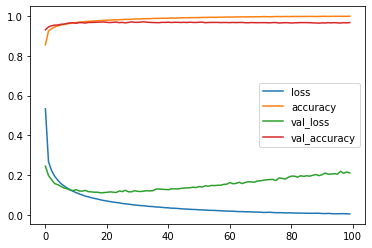

In [17]:
pd.DataFrame(history_callback.history).plot()

Text(0, 0.5, 'loss')

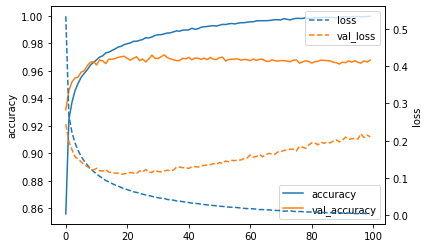

In [18]:
df = pd.DataFrame(history_callback.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.220
Test Accuracy: 0.963


In [20]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid,return_train_score=True)

<ipython-input-20-0a61dae27c19>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  clf = KerasClassifier(make_model)


In [21]:
grid.fit(X_train, y_train)

1500/1500 [==============================] - 2s 2ms/step - loss: 0.1194 - accuracy: 0.9654
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3883 - accuracy: 0.8924
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2060 - accuracy: 0.9410
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1651 - accuracy: 0.9531
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1391 - accuracy: 0.9592
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1047 - accuracy: 0.9688
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8946
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2038 - accuracy: 0.9410
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1645 - accuracy: 0.9514
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1396 - accuracy: 0.9584


1500/1500 [==============================] - 3s 2ms/step - loss: 0.3212 - accuracy: 0.9087
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1566 - accuracy: 0.9544
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1146 - accuracy: 0.9667
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0897 - accuracy: 0.9738
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0528 - accuracy: 0.9850
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3329 - accuracy: 0.9064
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1648 - accuracy: 0.9525
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1225 - accuracy: 0.9643
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0962 - accuracy: 0.9717
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0569 - accuracy: 0.9839


1500/1500 [==============================] - 2s 2ms/step - loss: 0.1577 - accuracy: 0.9542
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1132 - accuracy: 0.9671
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0876 - accuracy: 0.9736
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0721 - accuracy: 0.9781
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0595 - accuracy: 0.9824
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0512 - accuracy: 0.9845
Epoch 8/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0427 - accuracy: 0.9873
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0376 - accuracy: 0.9881
Epoch 10/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0218 - accuracy: 0.9945
Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3264 - accurac

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000179F6C23610>,
             param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
             return_train_score=True)

In [22]:
res = pd.DataFrame(grid.cv_results_)

In [23]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_hidden_size,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.949356,0.203640,0.665238,0.068738,1,32,"{'epochs': 1, 'hidden_size': 32}",0.927667,0.923250,0.926667,...,0.928083,0.005486,9,0.929646,0.931188,0.937208,0.937167,0.937750,0.934592,0.003450
1,2.946438,0.078082,0.644168,0.031056,1,64,"{'epochs': 1, 'hidden_size': 64}",0.948083,0.939833,0.939083,...,0.941917,0.005743,8,0.950875,0.948458,0.948000,0.948062,0.948333,0.948746,0.001078
2,3.800540,0.156171,0.771212,0.035334,1,256,"{'epochs': 1, 'hidden_size': 256}",0.958333,0.957083,0.958167,...,0.957850,0.001486,6,0.965229,0.967500,0.968083,0.968479,0.965354,0.966929,0.001373
3,13.540034,1.824154,0.667792,0.085512,5,32,"{'epochs': 5, 'hidden_size': 32}",0.958250,0.956250,0.955167,...,0.957233,0.002794,7,0.968750,0.971000,0.968854,0.971729,0.972562,0.970579,0.001533
4,15.634049,0.304502,0.828584,0.012886,5,64,"{'epochs': 5, 'hidden_size': 64}",0.968750,0.970000,0.966250,...,0.968100,0.001562,4,0.982917,0.985042,0.983854,0.985000,0.982854,0.983933,0.000956
5,20.708044,2.356690,0.834017,0.105053,5,256,"{'epochs': 5, 'hidden_size': 256}",0.975833,0.976667,0.967500,...,0.973683,0.003818,2,0.991958,0.992542,0.990333,0.993125,0.994438,0.992479,0.001351
6,23.681775,0.471637,0.568503,0.012824,10,32,"{'epochs': 10, 'hidden_size': 32}",0.963000,0.963833,0.962083,...,0.961033,0.002445,5,0.981687,0.983958,0.981396,0.980917,0.977833,0.981158,0.001964
7,25.424719,0.226837,0.609259,0.016564,10,64,"{'epochs': 10, 'hidden_size': 64}",0.970250,0.969083,0.968167,...,0.969350,0.001514,3,0.990833,0.989937,0.990562,0.994479,0.994104,0.991983,0.001911
8,36.331424,0.698122,0.779824,0.018061,10,256,"{'epochs': 10, 'hidden_size': 256}",0.980417,0.977000,0.975750,...,0.977533,0.002249,1,0.998417,0.997542,0.997542,0.997917,0.997792,0.997842,0.000322


In [24]:
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.928083          0.934592
             64                        0.941917          0.948746
             256                       0.957850          0.966929
5            32                        0.957233          0.970579
             64                        0.968100          0.983933
             256                       0.973683          0.992479
10           32                        0.961033          0.981158
             64                        0.969350          0.991983
             256                       0.977533          0.997842

In [25]:
grid.score(X_test, y_test)

313/313 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.98 - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9809


0.98089998960495

In [26]:

model = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
422/422 [==============================] - 14s 32ms/step - loss: 0.2009 - accuracy: 0.9390 - val_loss: 0.0946 - val_accuracy: 0.9710
Epoch 2/20
422/422 [==============================] - 13s 32ms/step - loss: 0.0761 - accuracy: 0.9760 - val_loss: 0.0779 - val_accuracy: 0.9767
Epoch 3/20
422/422 [==============================] - 13s 31ms/step - loss: 0.0484 - accuracy: 0.9848 - val_loss: 0.0809 - val_accuracy: 0.9775
Epoch 4/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0746 - val_accuracy: 0.9802
Epoch 5/20
422/422 [==============================] - 13s 30ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0953 - val_accuracy: 0.9780
Epoch 6/20
422/422 [==============================] - 12s 30ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0802 - val_accuracy: 0.9812
Epoch 7/20
422/422 [==============================] - 13s 30ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0979 - val_accuracy:

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)

In [28]:
score

[0.10784921795129776, 0.9801999926567078]

In [29]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 1024)              803840    
                                                                 
 dense_104 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_105 (Dense)           (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

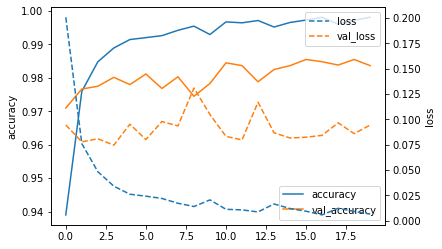

In [30]:
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [31]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
422/422 [==============================] - 14s 33ms/step - loss: 0.2991 - accuracy: 0.9067 - val_loss: 0.0986 - val_accuracy: 0.9718
Epoch 2/20
422/422 [==============================] - 14s 33ms/step - loss: 0.1427 - accuracy: 0.9554 - val_loss: 0.0808 - val_accuracy: 0.9762
Epoch 3/20
422/422 [==============================] - 15s 34ms/step - loss: 0.1103 - accuracy: 0.9660 - val_loss: 0.0891 - val_accuracy: 0.9717
Epoch 4/20
422/422 [==============================] - 14s 33ms/step - loss: 0.0943 - accuracy: 0.9710 - val_loss: 0.0698 - val_accuracy: 0.9800
Epoch 5/20
422/422 [==============================] - 14s 33ms/step - loss: 0.0852 - accuracy: 0.9737 - val_loss: 0.0681 - val_accuracy: 0.9807
Epoch 6/20
422/422 [==============================] - 14s 33ms/step - loss: 0.0726 - accuracy: 0.9767 - val_loss: 0.0653 - val_accuracy: 0.9822
Epoch 7/20
422/422 [==============================] - 15s 34ms/step - loss: 0.0696 - accuracy: 0.9786 - val_loss: 0.0633 - val_accuracy:

In [32]:
model_dropout.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_107 (Dense)           (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_108 (Dense)           (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

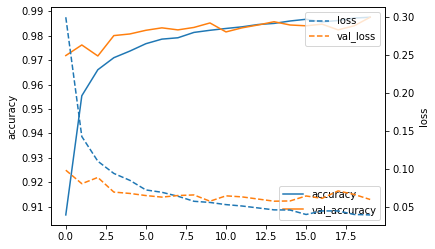

In [33]:
df = pd.DataFrame(history_dropout.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [34]:
score = model_dropout.evaluate(X_test, y_test, verbose=0)

In [35]:
score

[0.06357485055923462, 0.9850000143051147]

# Batch Normalization

In [36]:
from keras.layers import BatchNormalization

model_bn = Sequential([
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    Activation("relu"),
    Dense(512),
    BatchNormalization(),
    Activation("relu"),
    Dense(10, activation='softmax'),
])
model_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])


In [37]:
model_bn.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation_99 (Activation)  (None, 512)               0         
                                                                 
 dense_110 (Dense)           (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_100 (Activation)  (None, 512)            

In [38]:
history_bn = model_bn.fit(X_train, y_train, batch_size=128,
                    epochs=10, verbose=1, validation_split=.1)

Epoch 1/10
422/422 [==============================] - 7s 14ms/step - loss: 0.1751 - accuracy: 0.9461 - val_loss: 0.0902 - val_accuracy: 0.9738
Epoch 2/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0682 - accuracy: 0.9787 - val_loss: 0.0885 - val_accuracy: 0.9730
Epoch 3/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0428 - accuracy: 0.9861 - val_loss: 0.0729 - val_accuracy: 0.9780
Epoch 4/10
422/422 [==============================] - 6s 15ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0845 - val_accuracy: 0.9763
Epoch 5/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0798 - val_accuracy: 0.9810
Epoch 6/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0799 - val_accuracy: 0.9810
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.0643 - val_accuracy: 0.9832

Text(0, 0.5, 'loss')

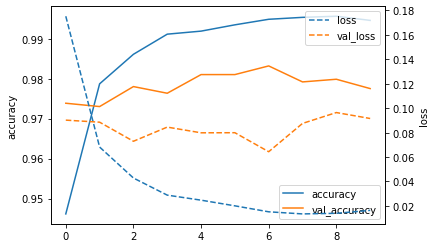

In [39]:
df = pd.DataFrame(history_bn.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

In [40]:
score = model_bn.evaluate(X_test, y_test, verbose=0)

In [41]:
score

[0.08928661793470383, 0.9763000011444092]